## Statistichal procedure for the data of the higgs boson

The following procedure is gathered from the CMS - NOTE 2011-005, and is the statistichal approach used to do an hypothesis test to determine wether the results for the higgs boson mass produced by the data is only created by background or an actual signal in combination with background.

We make the signal and the background functions of the nuiance parameter $\theta$, and denote them $s\left(\theta\right)$ and $b\left(\theta\right)$ respectfully.

1. Construct the likelyhood function
$$\mathcal{L}\left(\mbox{data}|\mu,\theta\right) = \mbox{Poisson}\left(\mbox{data}|\mu \cdot s\left(\theta\right) + b\left(\theta\right)\right)\cdot p\left(\tilde{\theta}|\theta\right)$$

* Data represents either actual experimental observation or pseudo-data used to construct sampling distributions

* $\mu$ is the signal strength modifier and $\theta$ represents the full suite of nuiance parameters

* Poissons(data|$\mu s + b$) stands for a product of Poisson probabilities to observe $n_i$ events in bins $i$:
$$\prod_{i} \frac{\left(\mu s_i + b_i\right)^{n_i}}{n_i !} e^{-\mu s_i - b_i}$$

2. To compare the compability of the data with the background -only and signal + background hypothesis, the test statistic $$\tilde{q_{\mu}} =  - 2ln \frac{\mathcal{L}\left(\mbox{data}|\mu,\hat{\theta_{\mu}}\right)}{\mathcal{L}\left(\mbox{data}|\hat{\mu},\hat{\theta_{\mu}}\right)},$$ with $0 \leq \hat{\mu} \leq \mu$. Where $\hat{\theta_{\mu}}$ refers to the conditional maximum likelyhood estimate of $\theta$, given the signal strength paramter $\mu$ and data. $\hat{\mu}$ and $\hat{\theta}$ correspond to the global maximum of the likelihood.

3. Find the observed value of the test statisitc $\tilde{q_{\mu}^{obs}}$ for the given signal strength modifier $\mu$ under test.

4. Find values of the nuisance paramters $\hat{\theta_{o}^{obs}}$ and $\hat{\theta}_{\mu}^{\mbox{obs}}$ best describing the experimentally observed data, for the background only and signal + background hypothesis, respectively. 

5. Use (a bit unsure because, in the CMS document it says generate toy monte carlo pseudo-data, but I assume that part is done, so I assume we are just supposed to use the generated one) the generated pseudo-data to construct $pdf$s $f\left(\tilde{q_{\mu}}|\mu, \hat{\theta}_{\mu}^{obs}\right)$ and $f\left(\tilde{q_{\mu}}|0, \hat{\theta}_{0}^{obs}\right)$ assuming a signal with strength $\mu$ in the signal + background hypothesis and for the background only hypothesis ($\mu = 0$).

6. Having constructed $f\left(\tilde{q_{\mu}}|\mu, \hat{\theta}_{\mu}^{obs}\right)$ and $f\left(\tilde{q_{\mu}}|0, \hat{\theta}_{0}^{obs}\right)$ distributions, define two p-values to be associated with the actual observation for the signal + background and background-only hypothesis, $p_{\mu}$ and $p_b$:
$$p_{\mu} = P\left(\tilde{q_{\mu}} \geq \tilde{q}_{\mu}^{obs}|\mbox{signal + background}\right) = \int_{\tilde{q}_{\mu}^{obs}}^{infty} f\left(\tilde{q}_{\mu}|\mu, \hat{\theta}_{\mu}^{obs}\right) d\tilde{q_{\mu}} $$

$$1- p_{b} = P\left(\tilde{q_{\mu}} \geq \tilde{q}_{\mu}^{obs}|\mbox{background only}\right) = \int_{\tilde{q}_{+0}^{obs}}^{infty} f\left(\tilde{q}_{\mu}|0, \hat{\theta}_{0}^{obs}\right) d\tilde{q_{\mu}}$$

and calculate $CL_{s}\left(\mu\right) = \frac{p_{\mu}}{1-p_{b}}$.

7. If, for $\mu = 1$, $CL_s \leq \alpha$, we would state that the SM Higgs boson is excluded with (1 - $\alpha$) confidence level.

8. To quote the 95$\%$ Confidence Level upper limit on $\mu$, to be further denoted as $\mu^{95\%CL}$ we adjust $\mu$ until we reach $CL_s = 0.05$.


Further the procedure states that the test statistic used for the higgs boson is $q_{\mu}$ with $\hat{\mu} \geq 0$. (see expression for $q_{\mu}$ above.)

In [4]:
#Useful packages
import pandas as pd
import scipy.stats as ss
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
import pyhf

### Uploading data

The filtering of the data from CERN produced a histogram showing the count of events yielding different estimates for the invariant mass of the higgs-boson. For further analysis, the produced histogram and pseudo-data is used to create the test-statistics q, and implement an hypothesis test for the q-parameter, determining the probability of our data containing a signal for the higgs boson or not. The data we are uploading are the numpy-arrays with counts for the different events from the simulated signal data, background data, and true signal data respectively, all following the binning given by the bins-array.

In [5]:
#Uploading counts from data
sim_signal_counts = np.load(r'C:\Users\vesle\Desktop\counts_77\signal_counts.npy')
sim_background_counts = np.load(r'C:\Users\vesle\Desktop\counts_77\background_counts.npy')
true_counts = np.load(r'C:\Users\vesle\Desktop\counts_77\true_counts.npy')
bins_data = np.load(r'C:\Users\vesle\Desktop\counts_77\bins.npy')

In [6]:
#checking that they all have the same length - array of bins should have one more
print("Number of bins: ", len(bins_data))
print("Number of events for simulated signal: ", len(sim_signal_counts))
print("Number of events for simulated background: ",len(sim_background_counts))
print("Number of events for true data: ",len(true_counts))

Number of bins:  80
Number of events for simulated signal:  79
Number of events for simulated background:  79
Number of events for true data:  79


In [127]:
print("Simulated signal counts: ", sim_signal_counts)
print("#####################################################################")
print("Simulated background counts: ", sim_background_counts)
print("#####################################################################")
print("Counts of the true data: ", true_counts)
print("#####################################################################")
print("Array of bins: ",bins_data)

Simulated signal counts:  [ 1.72527502e-01  1.86151292e-01  2.92355932e-01  3.57908321e-01
  4.66617711e-01  7.15619011e-01  1.25526479e+00  2.65779862e+00
  8.44184432e+00  4.15429615e+01  3.06647317e+01  2.06958001e+00
  2.11844903e-01  4.08810976e-02  1.23924608e-02  9.12151281e-03
  8.16222315e-03  4.44599265e-03  3.55434332e-03  5.49285594e-03
  5.50392750e-03  6.91309361e-03  2.03720787e-03  2.39548055e-04
  2.05569376e-03  4.89117296e-03  2.32807249e-04 -2.60542634e-04
  1.99460934e-03  1.37032289e-03  2.05338388e-03  1.52529588e-03
  1.25867662e-03  1.85035199e-03  6.29387021e-04  1.30395521e-03
  5.86366419e-04  4.21100005e-04  1.21794111e-03  5.92284487e-04
  1.78126473e-04  8.22347363e-04  1.85444097e-03  6.84201077e-05
  2.19023077e-04  3.16965041e-04  5.33581879e-05  7.22252120e-04
  5.80995184e-05  0.00000000e+00  2.34017763e-04  5.74897334e-04
  5.88820876e-05  6.01374741e-05  1.37301780e-04  3.59564787e-04
  5.38670065e-05  7.99418747e-04  1.41188281e-03  2.89946620e-04

### Defining necessary functions

For doing the statistical analysis, we are defining the test-statistic q given by:
$\tilde{q_{\mu}} =  - 2ln \frac{\mathcal{L}\left(\mbox{data}|\mu,\hat{\theta_{\mu}}\right)}{\mathcal{L}\left(\mbox{data}|\hat{\mu},\hat{\theta_{\mu}}\right)},$ with $0 \leq \hat{\mu} \leq \mu$. Where  $\hat{\mu}$ and $\hat{\theta}$ correspond to the global maximum of the likelihood. These are found my maximizing our likelyhood-function. The Likelyhood function and the function for $q$ is implemented below.

In [7]:

def log_likelyhood(mu,s,b,n):
    """ s = number of events in bin i from sim.data
    b = number of events in bin i from sim.data
    n = number of events from real data """
    val = mu*s +b
    return(sum(np.log(ss.poisson.pmf(n,val))))


def q_func(mu_1,mu_2,s,b,t,func=log_likelyhood):
    """ mu_1 = the value of mu above the fraction line
    mu_2 = the value of mu below the fraction line, will be set to best fit of dataset or 1
    s = number of events from sim.data
    b = number of events from sim.data
    t = number of events from real data
    func = the logarithm om the likelyhood function
    """
    log_val = func(mu_1,s,b,t) - func(mu_2,s,b,t)
    return(-2*log_val)

### Finding the q-values of our original data

In order to determine the different $q$-values for our data, we need to find the value of $\mu$ that best fits our data my maximizing the likelyhood function. This is done by using the optimize.minimze function in the scipy library, which we set to minimize the negative of our likelyhood-function.

In [8]:
#testing with our initial dataset
fun = lambda mu: -log_likelyhood(mu,sim_signal_counts,sim_background_counts,true_counts)
mu_opt = sp.optimize.minimize(fun,0.5,bounds=((0,1),))
print("The best fit value of mu for our original data is: ",mu_opt["x"][0])

The best fit value of mu for our original data is:  0.957114260308142


In [9]:
#Finding q0_obs
#Ratio of Likelyhood-functions with mu_1 = 0 and mu_2 = best fit 
q_obs_0 = q_func(0,1,sim_signal_counts,sim_background_counts,true_counts)
print("q_obs_0: ",q_obs_0)

q_obs_0:  188.33427811120902


In [10]:
#Finding q1_obs
#Ratio of Likelyhood-functions with mu_1 = 1 and mu_2 = best fit 
q_obs_1 = q_func(1,0.957114260308142,sim_signal_counts,sim_background_counts,true_counts)
print("q_obs_1: ",q_obs_1)

q_obs_1:  0.1257805815276356


### Generating toy distributions for q
For further analysis, we need to create distributions for q, allowing us to do an hypethesis test to evaluate the $q$-values we have observed in our data. This is done by creating toy distributions for $q_{\mu=0}$ and $q_{\mu=1}$.

In [11]:
def create_toy(mu,s,b):
    """return a random poisson distributed value
    with mu*s + b of bin i as its expected value"""
    return (ss.poisson.rvs((mu*s+b),size=1))


def create_toy_distr(mu,s,b,func = create_toy):
    toys_list = np.zeros(len(s))
    for i in range(len(s)):
        toys_list[i] = func(mu,s[i],b[i])
    return(toys_list)

In [12]:
#creating a dataframe with toy distributions mimiking our true counts

#For mu = 0
toy_data_mu_0 = pd.DataFrame([])

for i in range(1000):
    toys = pd.DataFrame(create_toy_distr(0,sim_signal_counts, sim_background_counts))
    toy_data_mu_0 = pd.concat([toy_data_mu_0,toys],ignore_index=True,axis = 1)

In [13]:
toy_data_mu_0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.0,2.0,5.0,5.0,8.0,2.0,0.0,1.0,2.0,4.0,...,6.0,2.0,2.0,4.0,2.0,5.0,3.0,6.0,6.0,5.0
1,2.0,2.0,2.0,2.0,3.0,0.0,4.0,5.0,7.0,4.0,...,4.0,2.0,0.0,5.0,5.0,5.0,2.0,3.0,4.0,2.0
2,3.0,3.0,3.0,3.0,2.0,3.0,0.0,2.0,1.0,4.0,...,0.0,2.0,2.0,0.0,4.0,2.0,4.0,0.0,3.0,2.0
3,2.0,4.0,1.0,6.0,1.0,1.0,1.0,3.0,3.0,1.0,...,4.0,3.0,3.0,4.0,3.0,4.0,5.0,6.0,6.0,5.0
4,2.0,2.0,3.0,6.0,4.0,3.0,3.0,2.0,5.0,3.0,...,3.0,1.0,2.0,5.0,5.0,3.0,3.0,2.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,12.0,15.0,15.0,10.0,14.0,17.0,16.0,10.0,18.0,14.0,...,19.0,15.0,16.0,11.0,13.0,20.0,12.0,11.0,12.0,12.0
75,6.0,11.0,9.0,12.0,15.0,11.0,12.0,14.0,12.0,14.0,...,18.0,14.0,14.0,11.0,16.0,7.0,18.0,9.0,10.0,12.0
76,11.0,9.0,12.0,12.0,18.0,11.0,18.0,18.0,17.0,11.0,...,16.0,15.0,8.0,17.0,13.0,11.0,10.0,7.0,15.0,16.0
77,7.0,11.0,19.0,16.0,14.0,13.0,7.0,7.0,17.0,13.0,...,13.0,8.0,8.0,16.0,12.0,12.0,18.0,13.0,6.0,13.0


In [14]:
toy_data_mu_1 = pd.DataFrame([])

#for mu = 1
for i in range(1000):
    toys = pd.DataFrame(create_toy_distr(1,sim_signal_counts, sim_background_counts))
    toy_data_mu_1 = pd.concat([toy_data_mu_1,toys],ignore_index=True,axis = 1)

In [15]:
toy_data_mu_1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,6.0,3.0,2.0,5.0,4.0,6.0,5.0,9.0,8.0,0.0,...,3.0,1.0,5.0,10.0,4.0,4.0,2.0,1.0,4.0,4.0
1,4.0,3.0,2.0,3.0,2.0,3.0,5.0,5.0,6.0,0.0,...,1.0,2.0,8.0,4.0,5.0,4.0,7.0,3.0,6.0,1.0
2,0.0,2.0,0.0,1.0,5.0,4.0,0.0,6.0,4.0,2.0,...,6.0,2.0,3.0,6.0,1.0,3.0,4.0,2.0,1.0,0.0
3,2.0,5.0,1.0,3.0,3.0,3.0,5.0,1.0,3.0,5.0,...,4.0,6.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,3.0
4,6.0,9.0,2.0,2.0,5.0,1.0,4.0,5.0,5.0,3.0,...,7.0,9.0,5.0,4.0,5.0,5.0,6.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,13.0,16.0,13.0,20.0,7.0,12.0,17.0,18.0,13.0,10.0,...,13.0,19.0,14.0,9.0,19.0,12.0,13.0,18.0,15.0,21.0
75,7.0,9.0,6.0,11.0,25.0,12.0,13.0,20.0,12.0,11.0,...,11.0,6.0,8.0,18.0,13.0,16.0,18.0,12.0,14.0,11.0
76,22.0,13.0,12.0,15.0,16.0,15.0,18.0,8.0,12.0,19.0,...,13.0,10.0,15.0,12.0,13.0,14.0,18.0,13.0,16.0,9.0
77,7.0,14.0,11.0,11.0,7.0,12.0,12.0,11.0,7.0,14.0,...,11.0,20.0,16.0,12.0,10.0,15.0,20.0,11.0,16.0,7.0


In [16]:
#Need to make a loop where we loop over all the different toy-datasets
#and calculate the optimal mu for each of them

n_toys = len(toy_data_mu_0.iloc[0,:])
mu_s_0 = np.zeros(n_toys)

#With mu equal to 0
for i in range(n_toys):
    index = i
    fun = lambda mu: -log_likelyhood(mu,sim_signal_counts,sim_background_counts,toy_data_mu_0.iloc[:,index])
    mu_opt_i = sp.optimize.minimize(fun,0.5,bounds=((0,1),))["x"]
    mu_s_0[i] = mu_opt_i

In [1]:
#print(mu_s_0)

In [17]:
#With mu equal to 1
mu_s_1 = np.zeros(n_toys)

for i in range(n_toys):
    index = i
    fun = lambda mu: -log_likelyhood(mu,sim_signal_counts,sim_background_counts,toy_data_mu_1.iloc[:,index])
    mu_opt_i = sp.optimize.minimize(fun,0.5,bounds=((0,1),))["x"]
    mu_s_1[i] = mu_opt_i

In [2]:
#print(mu_s_1)

Now we use the copies we have generated of our data to calculate $q$-values. We will create a set of values assuming only background data, and one set assuming a signal with strength $\mu = 1$. 

In [24]:
#Creating q's with mu_1=1 and | mu = 0
#This means the data-set was generated with mu set to zero.
num = len(toy_data_mu_0.iloc[0,:])
q_0_1s = np.zeros(num)

for i in range(num):
    q_0_1s[i] = q_func(1,mu_s_0[i],sim_signal_counts,sim_background_counts,toy_data_mu_0.iloc[:,i])

In [19]:
#Creating q's with mu=1 and | mu=1
num = len(toy_data_mu_1.iloc[0,:])
q_1_1s = np.zeros(num)

for i in range(num):
    q_1_1s[i] = q_func(1,mu_s_1[i],sim_signal_counts,sim_background_counts,toy_data_mu_1.iloc[:,i])

In [25]:
print(q_0_1s)

[ 93.59897294  91.05960438  96.54543999  85.75869979 116.03886523
 107.99591655 114.46065753  94.14197144 110.82052079 117.82332352
  85.13117765 112.19960822  94.54502546 115.81618701 105.24151811
  95.44508059  98.35477483  88.11272526 126.96592682 129.67827693
 114.36046315 113.09677901 107.1128311   97.10791641 108.49060791
  77.59834655 108.97509642 138.91108068 120.99336377 119.49582079
 107.18870943 114.90046909  92.79806111 130.01787771  84.21583385
 116.96256559 115.50175639 110.10890887 122.00961485 109.26011043
 113.38764156 121.29549386 112.57403901 143.51473838 102.56040253
  94.83629086 100.55589535 116.8770688  109.87742482 108.73604853
 111.50131261  96.79222196 124.78837176  89.19996332 104.60118503
 118.23910643 114.14326327 103.33593069 114.62035156 108.63428743
  97.0698893  116.70287482 116.68285075 107.32115421  99.81482225
 136.35035995 108.68231967 111.15218876 136.84838012 130.0334869
  96.99979855 119.14334953 115.2215572  124.12978112 127.24305205
 117.730342

In [21]:
print(q_1_1s)

[ 3.30512347e+00 -0.00000000e+00 -0.00000000e+00  2.54775126e+00
 -0.00000000e+00  3.02346350e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  5.75346473e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  4.39431622e-01  4.51697412e-01 -0.00000000e+00
  3.29924098e-01  3.17080824e+00  5.50139859e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.33735346e-01
 -0.00000000e+00 -0.00000000e+00  4.20039350e-01 -0.00000000e+00
 -0.00000000e+00  1.28325226e-03 -0.00000000e+00 -0.00000000e+00
  1.81090095e-01  5.95782720e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.56452241e-02 -0.00000000e+00 -0.00000000e+00
  6.67353824e-03 -0.00000000e+00  1.71412637e-01 -0.00000000e+00
 -0.00000000e+00  1.92780642e-02  2.61841897e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.30168614e+00  1.75661642e-01
 -0.00000000e+00  1.42711478e+00 -0.00000000e+00  5.33253642e-02
  3.61257200e-01 -0.00000000e+00  3.58927469e+00  7.18269167e-04
  1.30472363e-01 -0.00000

### Histogram representation of toy disitrbutions for q

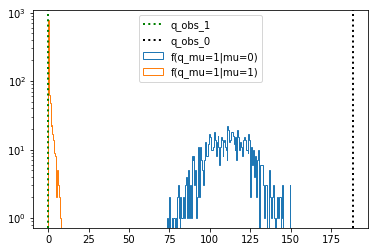

In [26]:
histogram_0 = plt.hist(q_0_1s, bins = np.arange(min(q_0_1s),max(q_0_1s) + 0.5,0.5),histtype = 'step',facecolor='c', label="f(q_mu=1|mu=0)")
histogram_1 = plt.hist(q_1_1s, bins = np.arange(min(q_1_1s),max(q_1_1s) + 0.5,0.5),histtype = 'step',facecolor='c',label ="f(q_mu=1|mu=1)")
plt.axvline(q_obs_1, color='green', linestyle='dotted', linewidth=2, label = "q_obs_1")
plt.axvline(q_obs_0, color='black', linestyle='dotted', linewidth=2, label = "q_obs_0")
plt.yscale('log')
plt.legend()
#plt.xlim((0,30))

We are quite certain that there is still something to be fixed with the data as the observed q-values should match better with the distributions we have created. Ideally, the observed values should be within the range of the toy-distributions.

In [35]:
#Creating q's with mu=0 and | mu=0
num = len(toy_data_mu_0.iloc[0,:])
q_0_0s = np.zeros(num)

for i in range(num):
    q_0_0s[i] = q_func(0,mu_s_0[i],sim_signal_counts,sim_background_counts,toy_data_mu_0.iloc[:,i])

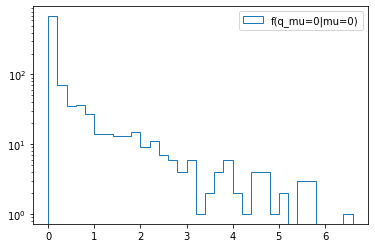

In [36]:
histogram_2 = plt.hist(q_0_0s, bins = np.arange(min(q_0_0s),max(q_0_0s) + 0.2,0.2),histtype = 'step',facecolor='c',label ="f(q_mu=0|mu=0)")
#plt.axvline(q_obs_1, color='black', linestyle='dotted', linewidth=2, label = "q_obs_1")
plt.yscale('log')
plt.legend()